In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

In [2]:
# Since the model is saved on google drive, we need to access to google dirve path
# To run locally, please comment thiese commands out.
%pwd
%cd /content/drive/My Drive/assignment3/

/content/drive/My Drive/assignment3


In [3]:
train_data = np.loadtxt('./data/train_data_RNN.csv',delimiter=',',skiprows=0)
test_data = np.loadtxt('./data/test_data_RNN.csv',delimiter=',',skiprows=0)

In [4]:

x_train = train_data[:, :-1]
y_train = train_data[:,-1]
x_test = test_data[:, :-1]
y_test = test_data[:,-1]


In [5]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_train, x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

Using TensorFlow backend.


In [6]:
model=tf.keras.models.load_model("./models/20834941_RNN_model.h5")
scores=model.evaluate(x_test,y_test)
pred = model.predict(x_test)


12/12 [==============================] - 0s 4ms/step - loss: 22.1032 - mean_absolute_error: 3.1517


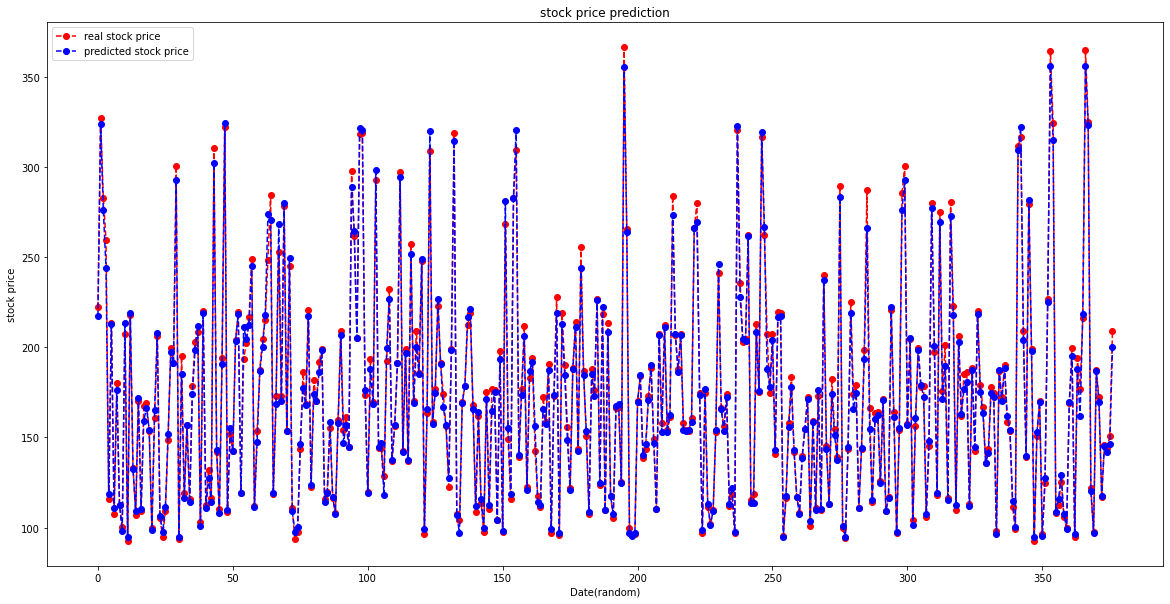

In [8]:
def plot_predictions(test, predicted):
    plt.figure(figsize=(20,10))
    plt.plot(test, color="red", marker='o', linestyle='dashed', label="real stock price")
    plt.plot(predicted, color="blue", marker='o', linestyle='dashed', label="predicted stock price")
    plt.title("stock price prediction")
    plt.xlabel("Date(random)")
    plt.ylabel("stock price")
    plt.legend()
    plt.show()

plot_predictions(y_test, pred)